In [244]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sn 
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [245]:
df= pd.read_csv("House-Price.csv", header=0)
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [246]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


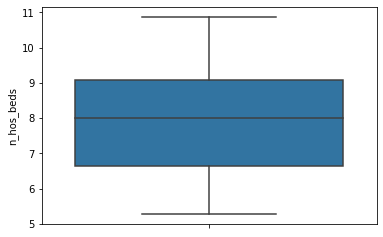

In [247]:
sns.boxplot(y="n_hos_beds", data=df)

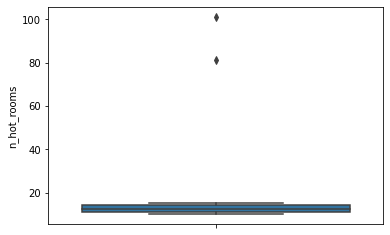

In [248]:
sns.boxplot(y="n_hot_rooms", data=df)

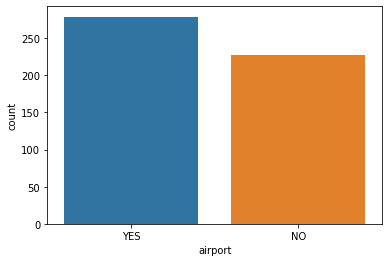

In [249]:
sns.countplot(x="airport", data=df)

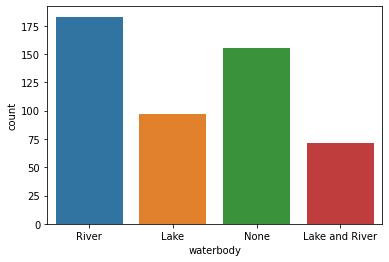

In [250]:
sns.countplot(x="waterbody", data=df)

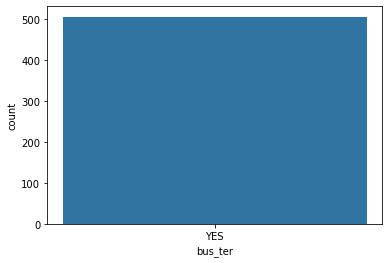

In [251]:
sns.countplot(x="bus_ter", data=df)

In [252]:
np.percentile(df.n_hot_rooms,[99])

np.percentile(df.n_hot_rooms,[99])[0]

uv= np.percentile(df.n_hot_rooms,[99])[0]

In [253]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [254]:
df.n_hot_rooms[(df.n_hot_rooms>3*uv)] = 3*uv

In [255]:
np.percentile(df.rainfall,[1])[0]
lv = np.percentile(df.rainfall, [1])[0]
df[(df.rainfall<lv)]
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [256]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

df = df.fillna(df.mean())

In [257]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [258]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.181818,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.513697,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


In [259]:
del df['dist3']
del df['dist1']
del df['dist2']
del df['dist4']
del df['bus_ter']

In [260]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,0,6.0625


In [261]:
df = pd.get_dummies(df)

In [262]:
del df['airport_NO']

del df['waterbody_None']

In [263]:
df.head()

##LOGISTIC REGRESSION 


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [264]:
X = df[['price']]
y = df[['Sold']]
X.head()
y.head()


clf_lrs = LogisticRegression()

clf_lrs.fit(X,y)

LogisticRegression()

In [265]:
clf_lrs.intercept_


array([0.61477516])

In [266]:
X_const = sn.add_constant(X)

X_const.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [267]:
logit = sm.Logit(y,X_const).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [268]:
logit.summary()





## Logistic with Multiple Prediction

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 May 2020   Pseudo R-squ.:                 0.01788
Time:                        16:41:57   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

In [269]:
X = df.loc[:, df.columns != 'Sold']
y = df['Sold']

In [270]:
clf_lr = LogisticRegression()

In [271]:
clf_lr.fit(X,y)

LogisticRegression()

In [272]:
clf_lr.coef_

array([[-0.251925  , -0.01906481, -0.15933746,  0.89319786, -0.005994  ,
         0.2356929 , -0.21367737,  0.16327448, -0.08249029, -0.00730652,
        -0.00752791, -0.33567797, -0.12471343, -0.07514299, -0.01536107,
         0.19223616]])

In [273]:
clf_lr.intercept_

array([0.00783252])

In [274]:
X_cons = sn.add_constant(X)

In [275]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556419
         Iterations 6


In [276]:
logit.summary()

## Prediction and Confusion matric 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Wed, 20 May 2020   Pseudo R-squ.:                  0.1924
Time:                        16:41:57   Log-Likelihood:                -281.55
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.868e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1347      2.649     -0.806      0.420      -7.327       3.058
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.472      -0.033       0.071
air_qual                    -7.4143      2.691     -2.755      0.006     -12.688      -2.140
room_num                     1.1066      0.277      4.000      0.000       0.564       1.649
age                         -0.0020      0.007     -0.301      0.763      -0.015       0.011
teachers                     0.3150      0.064      4.936      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0034      0.008     -0.412      0.680      -0.020       0.013
parks                       29.0968     24.177      1.204      0.229     -18.288      76.482
avg_dist                    -0.4016      0.098     -4.117      0.000      -0.593      -0.210
airport_YES                 -0.1525      0.211     -0.724      0.469      -0.565       0.260
waterbody_Lake              -0.1030      0.304     -0.339      0.734      -0.698       0.492
waterbody_Lake and River    -0.0620      0.328     -0.189      0.850      -0.705       0.581
waterbody_River              0.2395      0.256      0.937      0.349      -0.262       0.741
============================================================================================
"""

In [277]:
clf_lr.predict_proba(X)

array([[0.11942106, 0.88057894],
       [0.38470967, 0.61529033],
       [0.97446713, 0.02553287],
       ...,
       [0.27112923, 0.72887077],
       [0.27385869, 0.72614131],
       [0.17181601, 0.82818399]])

In [278]:
y_pred = clf_lr.predict(X)

In [279]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [280]:
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3).astype(bool)

In [281]:
y_pred_03


array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,

In [282]:
confusion_matrix(y,y_pred)

array([[198,  78],
       [ 79, 151]], dtype=int64)

In [283]:
confusion_matrix(y,y_pred_03)

##Performance Metrics
## Precision
## Recall
## AUC(ROC)

array([[121, 155],
       [ 17, 213]], dtype=int64)

In [284]:
precision_score(y,y_pred)

0.6593886462882096

In [285]:
recall_score(y,y_pred)

0.6565217391304348

In [286]:
roc_auc_score(y,y_pred)


0.6869565217391306

In [287]:
##Linear Discriminant Analysis
clf_lda = LinearDiscriminantAnalysis()

In [288]:
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [289]:
y_pred_lda = clf_lda.predict(X)

In [290]:
confusion_matrix(y,y_pred_lda)


array([[192,  84],
       [ 79, 151]], dtype=int64)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [292]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [293]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [294]:
y_test_pred =clf_lr.predict(X_test)

In [295]:
confusion_matrix(y_test,y_test_pred)

array([[37, 21],
       [14, 30]], dtype=int64)

In [296]:
accuracy_score(y_test, y_test_pred)


##K-NEAREST NEIGHBORS

0.6568627450980392

In [297]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [298]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)
X_test_s

array([[ 3.46427198e-02, -1.26009787e+00, -7.59976330e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 3.08888478e+00,  1.09537107e+00,  6.84309089e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 7.92301952e-02,  4.28041039e-01,  1.73890573e-04, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       ...,
       [-4.00085165e-01, -9.60512654e-01, -8.19099125e-01, ...,
        -4.93864798e-01, -3.98862018e-01,  1.32542701e+00],
       [ 6.47720506e-01, -9.50442563e-02, -5.15039037e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [-2.77469608e-01, -4.16820968e-01, -2.53209516e-01, ...,
        -4.93864798e-01,  2.50713268e+00, -7.54473836e-01]])

In [299]:
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [300]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[30, 28],
       [19, 25]], dtype=int64)

In [301]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.5392156862745098

In [302]:



#$$

In [303]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [304]:
confusion_matrix(y_test, clf_knn_3.predict(X_test_s))

array([[32, 26],
       [21, 23]], dtype=int64)

In [305]:
accuracy_score(y_test, clf_knn_3.predict(X_test_s))





##KNEIGHBOR CLASSIER 

0.5392156862745098

In [306]:
params ={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)
grid_search_cv.fit(X_train_s, y_train)



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [307]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [308]:
optimised_KNN = grid_search_cv.best_estimator_

In [309]:
y_test_pred = optimised_KNN.predict(X_test_s)

In [310]:
confusion_matrix(y_test, y_test_pred)

array([[35, 23],
       [18, 26]], dtype=int64)

In [311]:
accuracy_score(y_test, y_test_pred)

0.5980392156862745